# Getting Datasets from Pytorch Geometric

In [6]:
import torch

In [1]:
from torch_geometric.datasets import AmazonBook

/opt/anaconda3/lib/python3.11/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: dlopen(/opt/anaconda3/lib/python3.11/site-packages/libpyg.so, 0x0006): Library not loaded: /Library/Frameworks/Python.framework/Versions/3.11/Python
  Referenced from: <CA14ED34-FA3D-31FE-B4AD-2B2A8446B324> /opt/anaconda3/lib/python3.11/site-packages/libpyg.so
  Reason: tried: '/Library/Frameworks/Python.framework/Versions/3.11/Python' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.11/Python' (no such file), '/Library/Frameworks/Python.framework/Versions/3.11/Python' (no such file)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/opt/anaconda3/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/opt/anaconda3/lib/python3.11/site-packages/torch_s

In [2]:
dataset = AmazonBook(root = './amazonbook')

Processing...
Done!


In [4]:
data = dataset[0]

In [33]:
data.num_nodes

144242

In [85]:
# Load the processed data
print(dataset[0])

# Check the node types and number of nodes
print(f"User nodes: {dataset[0]['user'].num_nodes}")
print(f"Book nodes: {dataset[0]['book'].num_nodes}")

HeteroData(
  user={ num_nodes=52643 },
  book={ num_nodes=91599 },
  (user, rates, book)={
    edge_index=[2, 2380730],
    edge_label_index=[2, 603378],
  },
  (book, rated_by, user)={ edge_index=[2, 2380730] }
)
User nodes: 52643
Book nodes: 91599


In [86]:

# Inspect the edge indices (relationship between users and books)
print(f"Edge index (user -> book): \n {dataset[0]['user', 'rates', 'book']['edge_index']}")
print(f"Edge index (book -> user): \n {dataset[0]['book', 'rated_by', 'user']['edge_index']}")


Edge index (user -> book): 
 tensor([[    0,     0,     0,  ..., 52642, 52642, 52642],
        [    0,     1,     2,  ..., 23186, 10690, 10874]])
Edge index (book -> user): 
 tensor([[    0,     1,     2,  ..., 23186, 10690, 10874],
        [    0,     0,     0,  ..., 52642, 52642, 52642]])


In [87]:
data = dataset[0]

In [88]:
print("Node types:", data.node_types)
print("Edge types:", data.edge_types)


Node types: ['user', 'book']
Edge types: [('user', 'rates', 'book'), ('book', 'rated_by', 'user')]


In [89]:
user_to_book_edge_index = data['user', 'rates', 'book']['edge_index']
print('Edge index (user -> book):\n', user_to_book_edge_index)


Edge index (user -> book):
 tensor([[    0,     0,     0,  ..., 52642, 52642, 52642],
        [    0,     1,     2,  ..., 23186, 10690, 10874]])


In [37]:
#selects 100 random nodes 
subset_user_ids = torch.randint(0,data['user'].num_nodes,(1000,))

In [38]:
node_dict = {'user':subset_user_ids}
subset_data = data.subgraph(node_dict)

In [39]:
subset_data

HeteroData(
  user={ num_nodes=1000 },
  book={ num_nodes=91599 },
  (user, rates, book)={
    edge_index=[2, 44047],
    edge_label_index=[2, 603378],
  },
  (book, rated_by, user)={ edge_index=[2, 44047] }
)

# Taobao Dataset 

In [94]:
from torch_geometric.datasets import Taobao

In [95]:
#first time run the below 
#dataset = Taobao(root='taobao', force_reload=True)
dataset = Taobao(root  = 'taobao')

In [ ]:
taobao = dataset[0]

In [ ]:
taobao.node_types

['user', 'item', 'category']

In [ ]:
taobao.edge_types

[('user', 'to', 'item'), ('item', 'to', 'category')]

In [118]:
#edge indices 
user_item_edge_index  = taobao['user', 'item'].edge_index
item_category_edge_index = taobao['item', 'category'].edge_index

In [122]:
from torch_geometric.utils import degree
import torch

In [123]:
# Compute degrees for users
num_users = taobao['user'].num_nodes
user_indices = user_item_edge_index[0]
user_degrees = degree(user_indices, num_nodes=num_users, dtype=torch.long)


In [125]:
# Compute degrees for items
num_items = taobao['item'].num_nodes
item_indices_from_users = user_item_edge_index[1]
item_indices_to_categories = item_category_edge_index[0]
item_in_degrees_from_users = degree(item_indices_from_users, num_nodes=num_items, dtype=torch.long)
item_out_degrees_to_categories = degree(item_indices_to_categories, num_nodes=num_items, dtype=torch.long)


In [126]:
# Compute degrees for categories
num_categories = taobao['category'].num_nodes
category_indices = item_category_edge_index[1]
category_in_degrees = degree(category_indices, num_nodes=num_categories, dtype=torch.long)


In [127]:
import matplotlib.pyplot as plt

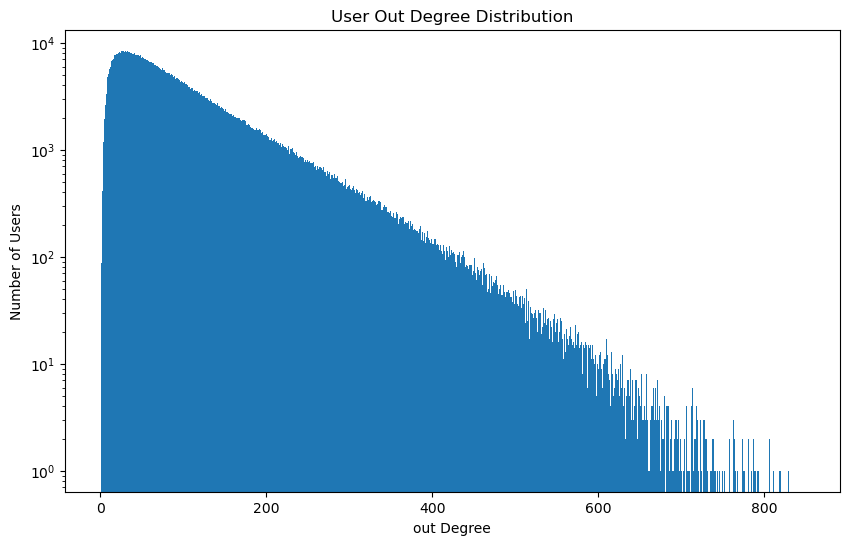

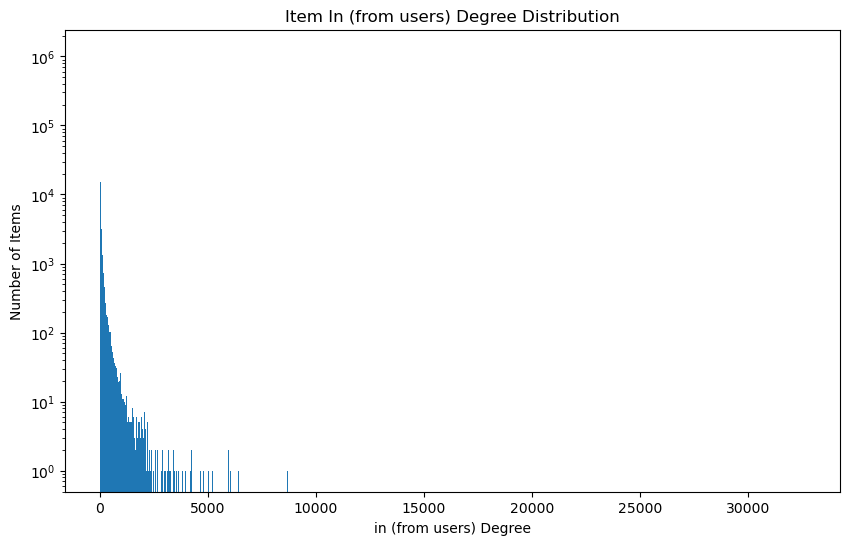

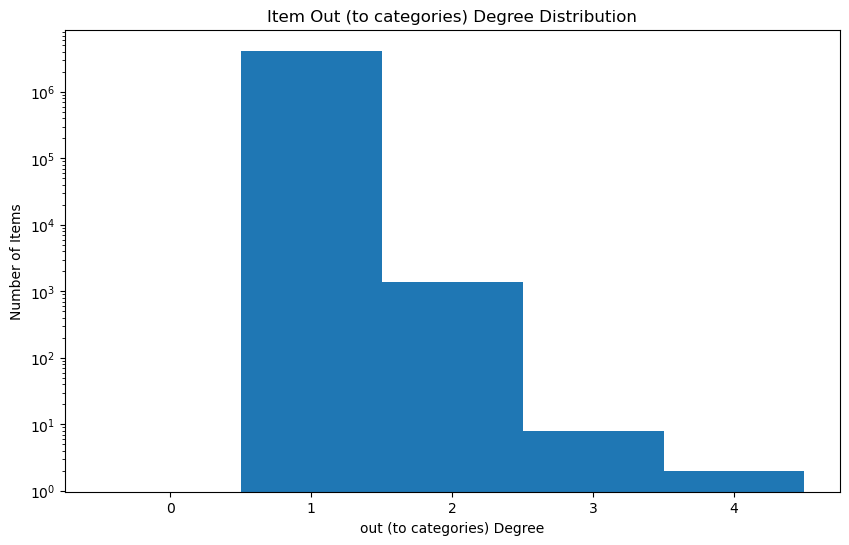

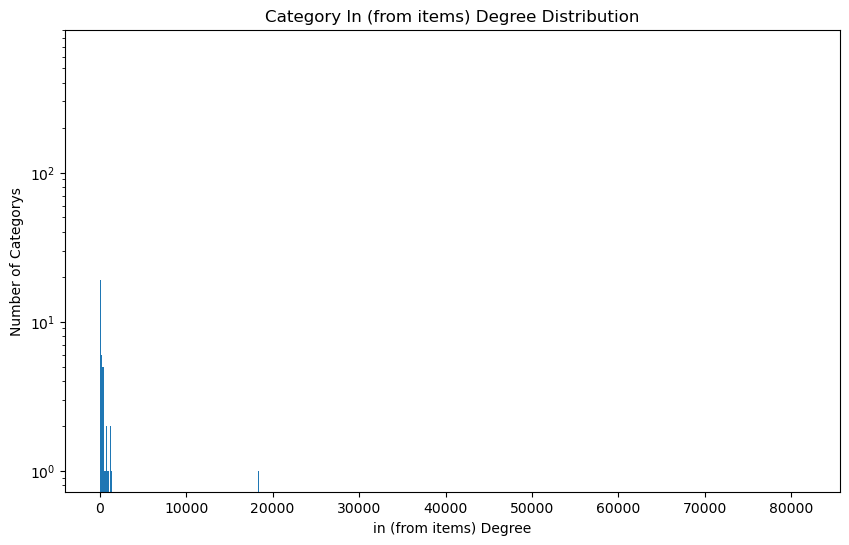

In [128]:
# Compute degree distributions
def plot_degree_distribution(degrees, node_type, degree_type):
    degree_counts = torch.bincount(degrees)
    degree_values = torch.arange(len(degree_counts))

    plt.figure(figsize=(10, 6))
    plt.bar(degree_values.numpy(), degree_counts.numpy(), width=1.0)
    plt.xlabel(f'{degree_type} Degree')
    plt.ylabel(f'Number of {node_type.capitalize()}s')
    plt.title(f'{node_type.capitalize()} {degree_type.capitalize()} Degree Distribution')
    plt.yscale('log')  # Use log scale for better visibility
    plt.show()

# Plotting degree distributions
plot_degree_distribution(user_degrees, 'user', 'out')
plot_degree_distribution(item_in_degrees_from_users, 'item', 'in (from users)')
plot_degree_distribution(item_out_degrees_to_categories, 'item', 'out (to categories)')
plot_degree_distribution(category_in_degrees, 'category', 'in (from items)')



In [129]:
# Compute mean and median degrees
mean_user_degree = user_degrees.float().mean().item()
median_user_degree = user_degrees.float().median().item()
print(f"Mean User Degree: {mean_user_degree:.2f}")
print(f"Median User Degree: {median_user_degree:.2f}")

mean_item_in_degree = item_in_degrees_from_users.float().mean().item()
median_item_in_degree = item_in_degrees_from_users.float().median().item()
print(f"Mean Item In-Degree (from Users): {mean_item_in_degree:.2f}")
print(f"Median Item In-Degree (from Users): {median_item_in_degree:.2f}")

mean_item_out_degree = item_out_degrees_to_categories.float().mean().item()
median_item_out_degree = item_out_degrees_to_categories.float().median().item()
print(f"Mean Item Out-Degree (to Categories): {mean_item_out_degree:.2f}")
print(f"Median Item Out-Degree (to Categories): {median_item_out_degree:.2f}")

mean_category_in_degree = category_in_degrees.float().mean().item()
median_category_in_degree = category_in_degrees.float().median().item()
print(f"Mean Category In-Degree: {mean_category_in_degree:.2f}")
print(f"Median Category In-Degree: {median_category_in_degree:.2f}")

Mean User Degree: 101.31
Median User Degree: 75.00
Mean Item In-Degree (from Users): 24.05
Median Item In-Degree (from Users): 3.00
Mean Item Out-Degree (to Categories): 1.00
Median Item Out-Degree (to Categories): 1.00
Mean Category In-Degree: 441.09
Median Category In-Degree: 53.00


# Connecting to Google Big Query 

In [96]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [97]:
key_path = "cpsc483-49e73bf4d565.json"
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials=credentials, project=credentials.project_id)


In [98]:
dataset_id = "final_project"
table_id = "taobao"

In [99]:
table_ref = client.dataset(dataset_id).table(table_id)

In [100]:
table = client.get_table(table_ref)

In [101]:
query = "Select * from cpsc483.final_project.taobao limit 10000"

In [102]:
query_job = client.query(query)  # Make an API request to execute the query

In [103]:
df = query_job.to_dataframe() 

/opt/anaconda3/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [104]:
df

,userId,itemId,categoryId,behaviorType,timestamp
0,580045,4664713,721664,pv,1512276886
1,832241,808112,721664,pv,1512282159
2,575635,854934,721664,pv,1511710445
3,805537,1217839,721664,pv,1512287749
4,904909,3211819,721664,pv,1511705511
...,...,...,...,...,...
9995,299908,2608238,4244487,pv,1512227359
9996,746029,4897873,4244487,pv,1512138805
9997,952799,261976,4244487,pv,1511628515
9998,551540,3379970,4244487,pv,1512122057


# Node Degree Distribution 

Out-Degree for Users: Number of items each user has interacted with.

In-Degree for Items (from Users): Number of users who have interacted with each item.

Out-Degree for Items: Number of categories each item belongs to.

In-Degree for Categories: Number of items in each category.


In [105]:
outdegreeUsersQ = """
SELECT userId, COUNT(DISTINCT itemId) AS out_degree
FROM cpsc483.final_project.taobao
GROUP BY userId;
"""

In [106]:
query_job = client.query(outdegreeUsersQ) 
outdegreeUsers = query_job.to_dataframe() 

/opt/anaconda3/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [107]:
outdegreeUsers.shape

(987994, 2)

In [108]:
outdegreeUsers.sort_values(by = 'out_degree', ascending = False)

,userId,out_degree
108371,435009,710
297571,208813,699
256158,503757,698
105645,419460,687
239005,54206,681
...,...,...
294793,489899,1
179696,195014,1
65176,190075,1
294601,350058,1


In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
np.mean(outdegreeUsers['out_degree'])

76.89281412640157

In [111]:
np.median(outdegreeUsers['out_degree'])

58.0

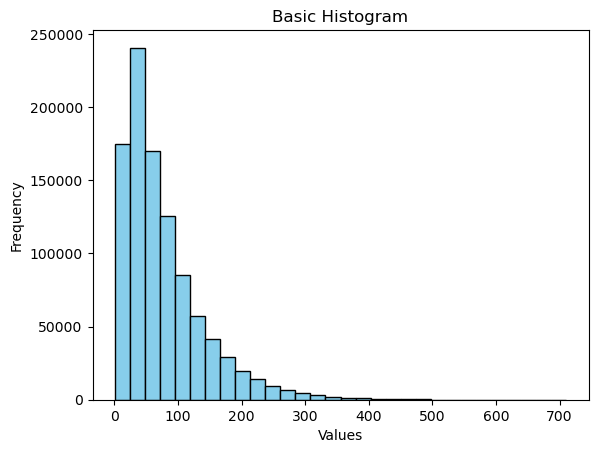

In [112]:
plt.hist(outdegreeUsers['out_degree'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [ ]:
# Edge index between users and items
user_item_edge_index = dataset[].edge_index
print('User-Item Edge Index shape:', user_item_edge_index.shape)

# Edge index between items and categories
item_category_edge_index = data['item', 'category'].edge_index
print('Item-Category Edge Index shape:', item_category_edge_index.shape)


Train Colab 2 
- edge, node prediction 
- 
and Colab 3
- attention  

with these two data sets 
Colab 3 change adjacency matrix with attention diffusion matrix 

In KGAT

First, 
utility folder, helper.py: has numerous functions such as txt2list, merge_two_dicts, and early_stopping 
utility folder, batch_test.py 
uses loader_kgat.py 
All the functions here use functions created lower in the file 
-  generate the sparse adjacency matrices for user-item interaction & relational kg data. ``self.adj_list, self.adj_r_list = self._get_relational_adj_list()`` 
- generate the sparse laplacian matrices. ``self.lap_list = self._get_relational_lap_list()``

- generate the triples dictionary, key is 'head', value is '(tail, relation)'. ``self.all_kg_dict = self._get_all_kg_dict()``

- ``self.all_h_list, self.all_r_list, self.all_t_list, self.all_v_list = self._get_all_kg_data()``

In Main.py 
Loads the Laplacian matrix
config['A_in] = sum(data_generator.lap_list)

In [ ]:
#IN KGAT.py 

if args.model_type in ['kgat']: 
    model = KGAT(data_config = config, pretrain_data = pretrain_data, args = args)